# Sample code for Question 1

This notebook shows how you can use the provided Python function to pull player stats from an online website.
This function lives in a custom package that is provided to you in this repository.
You are encouraged to leverage this package as a skeleton and add all of your reusable code, functions, etc. into relevant modules.
This makes collaboration much easier as the package could be seen as a "single source of truth" to pull data, create visualizations, etc. rather than relying on a jumble of notebooks.
You can still run into trouble if branches are not frequently merged as work progresses, so try to not let your branches diverge too much.

In [33]:
from ift6758.data import get_player_stats

If the above doesn't work for you, make sure you've installed the repo as specified in the readme file. 
Essentially you must make sure that your environment is setup (either through conda or virtualenv), and then install it using:

```bash
pip install -e /path/to/repo 
```

The nice thing using this approach is if you have your environment activated, you can import modules from anywhere on your system!

In [34]:
df = get_player_stats(2016, 'goalies')

Retrieving data from 'https://www.hockey-reference.com/leagues/NHL_2016_goalies.html'...


If you're curious, this function uses the `pd.read_html()` method ([doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)), which internally uses [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to parse HTML data.

In [35]:
df.head()

Rk             Player Age   Tm  GP  GS   W   L T/O   GA  ...   MIN  QS  \
0  1         Jake Allen  25  STL  47  44  26  15   3  101  ...  2583  26   
1  2  Frederik Andersen  26  ANA  43  37  22   9   7   88  ...  2298  24   
2  3     Craig Anderson  34  OTT  60  60  31  23   5  161  ...  3477  31   
3  4    Richard Bachman  28  VAN   1   1   1   0   0    3  ...    60   0   
4  5   Niklas Bäckström  37  CGY   4   3   2   2   0   13  ...   233   2   

    QS% RBS GA%-  GSAA  G  A PTS PIM  
0  .591   6   94  6.28  0  0   0   0  
1  .649   5   95  4.46  0  1   1   2  
2  .517   8   99  2.05  0  2   2   0  
3  .000   0  NaN   NaN  0  0   0   0  
4  .667   1  NaN   NaN  0  0   0   0  

[5 rows x 26 columns]

# Warm Up

In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
%matplotlib inline

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams['figure.dpi'] = 100 

*Q 1.1* We’ll try to explore goaltenders and consider who was the best goaltender of the *2017-2018* season.

In [45]:
df = get_player_stats(2016, 'goalies')

Retrieving data from 'https://www.hockey-reference.com/leagues/NHL_2016_goalies.html'...


Proposed feature

In [46]:
# proposed metric: SV% * log(1+GP) * GAA
df['new'] = np.log(1 + df['GP'].astype("float")) * df['SV%'].astype("float") * df['GAA'].astype("float")
df.sort_values(by="new", ascending = False, inplace = True)
print(df)

    Rk               Player Age   Tm  GP  GS   W   L T/O   GA  ...  QS    QS%  \
2    3       Craig Anderson  34  OTT  60  60  31  23   5  161  ...  31   .517   
84  87      Semyon Varlamov  27  COL  57  57  27  25   3  148  ...  25   .439   
35  36         Jonas Hiller  33  CGY  26  23   9  11   1   79  ...   7   .304   
13  14          Mike Condon  25  MTL  55  51  21  25   6  141  ...  24   .471   
72  74          Tuukka Rask  28  BOS  64  62  31  22   8  157  ...  34   .548   
..  ..                  ...  ..  ...  ..  ..  ..  ..  ..  ...  ...  ..    ...   
14  15       Pheonix Copley  24  STL   1   0   0   0   0    1  ...   0    NaN   
52  53     Charlie Lindgren  22  MTL   1   1   1   0   0    2  ...   1  1.000   
50  51     Michael Leighton  34  CHI   1   0   0   0   0    1  ...   0    NaN   
29  30  Kristers Gudlevskis  23  TBL   1   1   0   0   1    1  ...   1  1.000   
19  20       Chris Driedger  21  OTT   1   0   0   0   0    0  ...   0    NaN   

   RBS GA%-    GSAA  G  A P

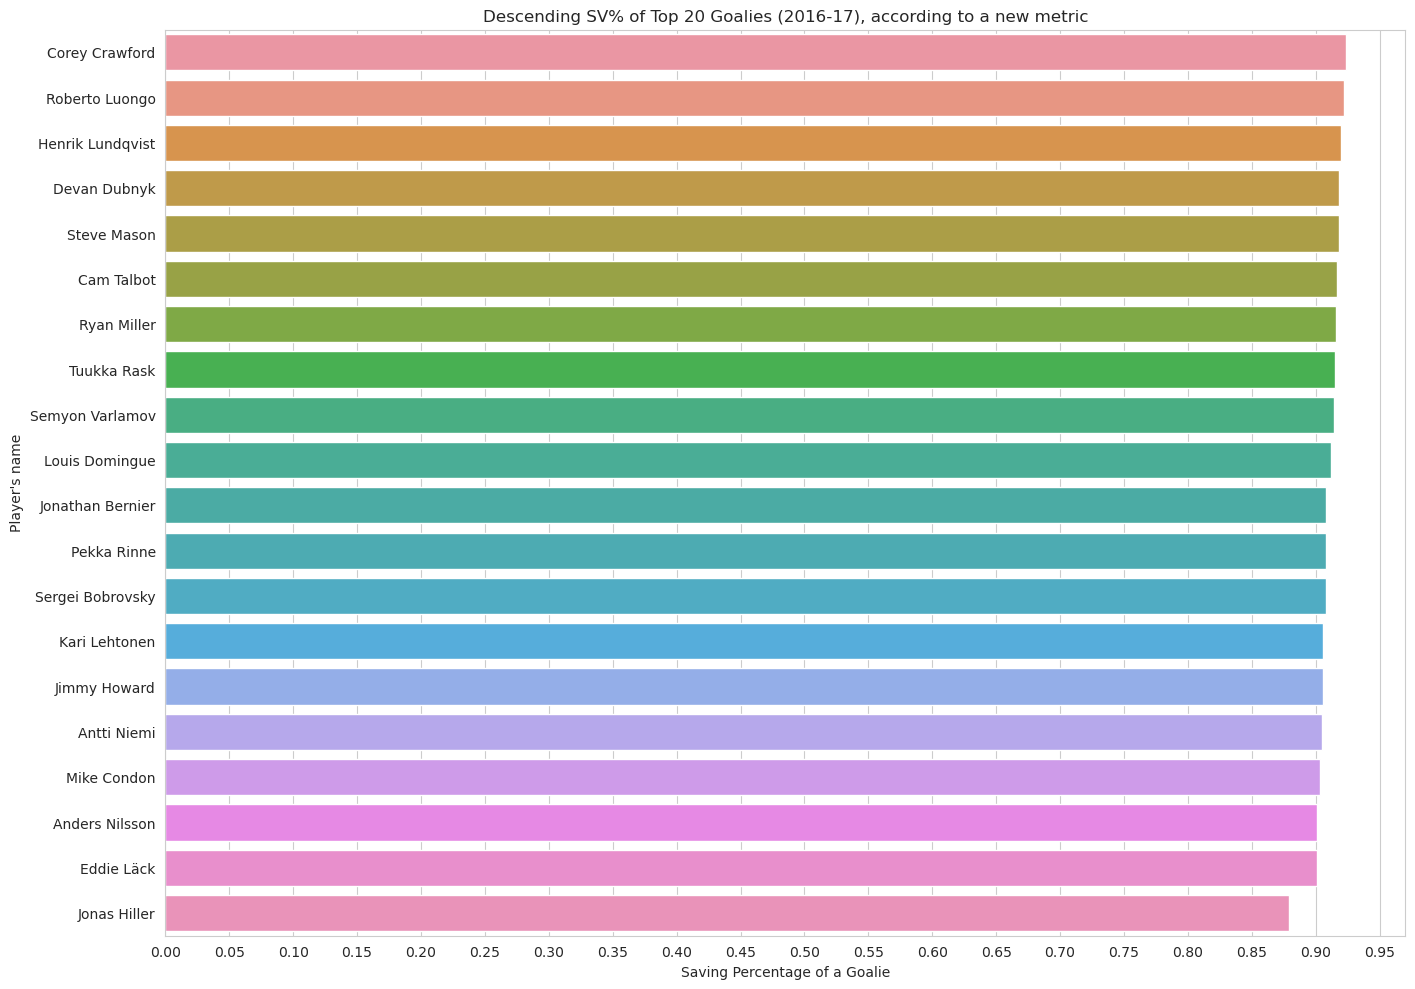

In [47]:
df = df.iloc[1:21, :]

df.sort_values(by="SV%", ascending = False, inplace = True)

df['Player'] = df['Player'].astype('string')
df['SV%'] = df['SV%'].astype('float64')

sns.set_style("whitegrid")

hf = plt.figure()
hf.set_size_inches( (16,12) )

hf = sns.barplot(y = 'Player', x = 'SV%', data = df)

hf.set_xticks(np.arange(0, 1, 0.05))

hf.title.set_text("Descending SV% of Top 20 Goalies (2016-17), according to a new metric")

hf.set_xlabel('Saving Percentage of a Goalie')
hf.set_ylabel("Player's name")

fig = hf.get_figure()
fig.savefig("goalie_stats_2016.png")

In [48]:
df = get_player_stats(2017, 'goalies')

Retrieving data from 'https://www.hockey-reference.com/leagues/NHL_2017_goalies.html'...


In [49]:
# proposed metric: SV% * log(1+GP) * GAA
df['new'] = np.log(1 + df['GP'].astype("float")) * df['SV%'].astype("float") * df['GAA'].astype("float")
df.sort_values(by="new", ascending = False, inplace = True)
print(df)

    Rk               Player Age   Tm  GP  GS   W   L T/O   GA  ...  QS   QS%  \
61  66          Petr Mrazek  24  DET  50  44  18  21   9  145  ...  19  .432   
80  85           Mike Smith  34  ARI  55  55  19  26   9  156  ...  27  .491   
65  70          Antti Niemi  33  DAL  37  30  12  12   4   95  ...  14  .467   
34  38    Connor Hellebuyck  23  WPG  56  53  26  19   4  146  ...  25  .472   
69  74       Calvin Pickard  24  COL  50  48  15  31   2  140  ...  21  .438   
..  ..                  ...  ..  ...  ..  ..  ..  ..  ..  ...  ...  ..   ...   
11  14        Jack Campbell  25  LAK   1   0   0   0   0    0  ...   0   NaN   
63  68     Alex Nedeljkovic  21  CAR   1   0   0   0   0    0  ...   0   NaN   
85  90      Dustin Tokarski  27  ANA   1   0   0   0   0    0  ...   0   NaN   
29  33  Kristers Gudlevskis  24  TBL   1   0   0   0   0    0  ...   0   NaN   
1    2          Jorge Alves  38  CAR   1   0   0   0   0    0  ...   0   NaN   

   RBS GA%-    GSAA  G  A PTS PIM      

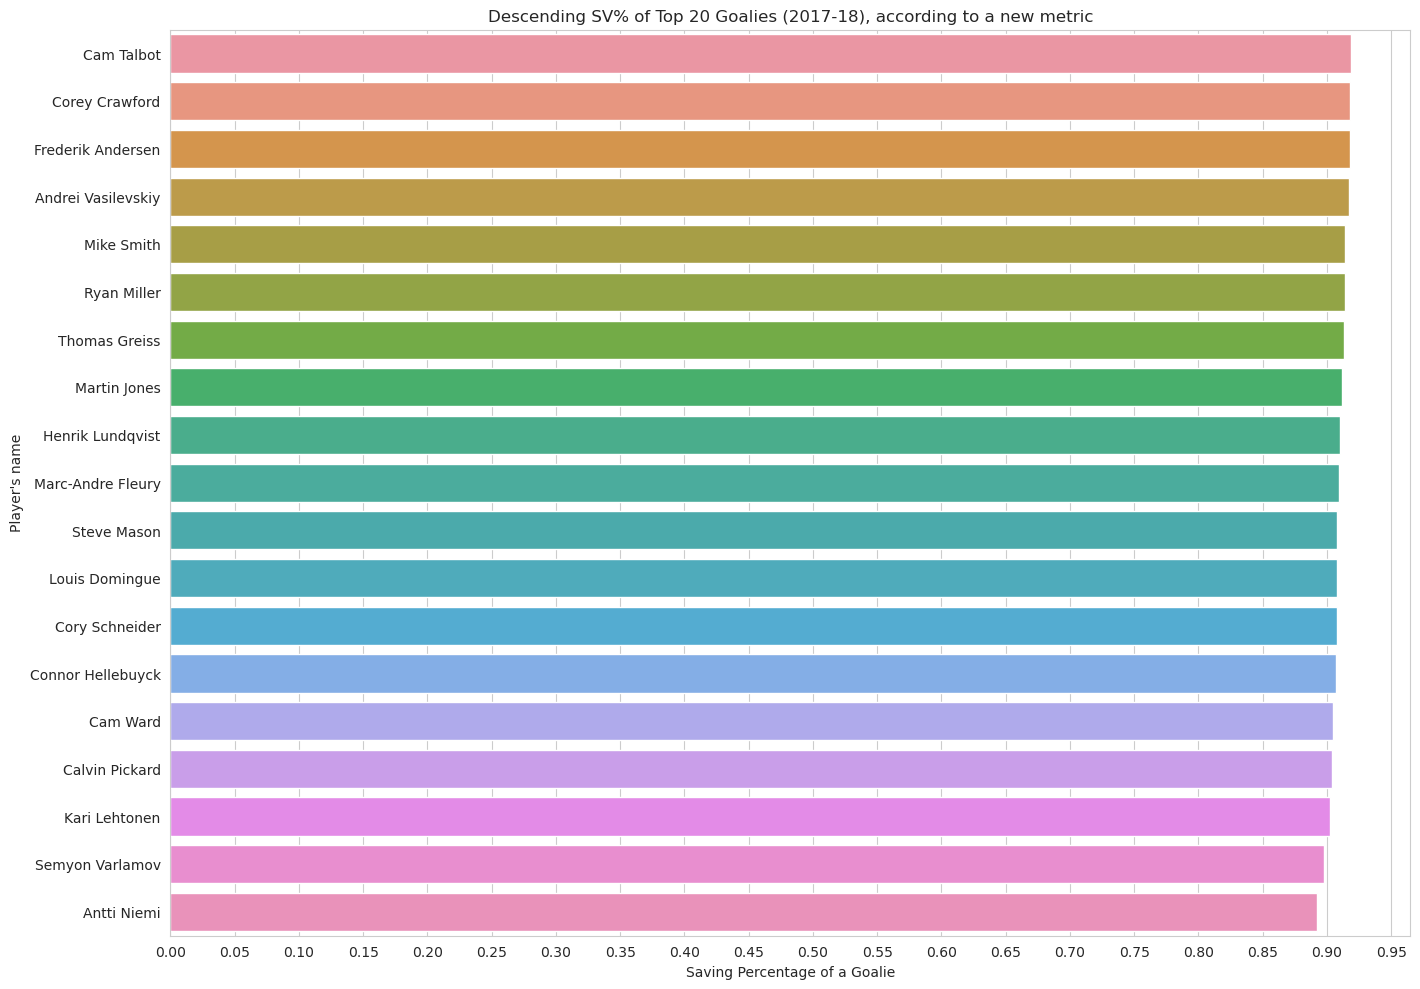

In [51]:
df = df.iloc[1:21, :]

df.sort_values(by="SV%", ascending = False, inplace = True)

df['Player'] = df['Player'].astype('string')
df['SV%'] = df['SV%'].astype('float64')

sns.set_style("whitegrid")

hf = plt.figure()
hf.set_size_inches( (16,12) )

hf = sns.barplot(y = 'Player', x = 'SV%', data = df)

hf.set_xticks(np.arange(0, 1, 0.05))

hf.title.set_text("Descending SV% of Top 20 Goalies (2017-18), according to a new metric")

hf.set_xlabel('Saving Percentage of a Goalie')
hf.set_ylabel("Player's name")

fig = hf.get_figure()
fig.savefig("goalie_stats_2017.png")

# Data Acquisition

download raw data from https://statsapi.web.nhl.com/api/v1/game/[GAME_ID]/feed/live/
manual load into dataframe

Example usage shown and commented below

In [13]:
#imports
from ift6758.data.functions import loadstats
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px
import pandas as pd
import json
import numpy as np

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


In [14]:

#preload and download from web if not acquired (set to false to download all data)
downloaded = True
if not downloaded:
    datayear = 2016
    while datayear <= 2020:
        loadstats(datayear,'./data/')
        datayear += 1
    
#outputs games that aren't played up to 7 in playoffs or max games in regular season
dfs = loadstats(2019,'./data/')
# print(df2019.iloc[:,1270])
# print(df2019['2019020001'])

size of data in regular season: 1271
Error code: 404 at gameID:2019030007. Game not found.
Error code: 404 at gameID:2019030017. Game not found.
Error code: 404 at gameID:2019030026. Game not found.
Error code: 404 at gameID:2019030036. Game not found.
Error code: 404 at gameID:2019030046. Game not found.
Error code: 404 at gameID:2019030056. Game not found.
Error code: 404 at gameID:2019030066. Game not found.
Error code: 404 at gameID:2019030076. Game not found.
Error code: 404 at gameID:2019030086. Game not found.
Error code: 404 at gameID:2019030096. Game not found.
size of data in regular season & playoffs: 1428


In [15]:
# playbyplay shown
pd.DataFrame.from_dict(dfs['2019020001']['liveData']['plays']['allPlays']).head()

result  \
0  {'event': 'Game Scheduled', 'eventCode': 'TOR1...   
1  {'event': 'Period Ready', 'eventCode': 'TOR5',...   
2  {'event': 'Period Start', 'eventCode': 'TOR8',...   
3  {'event': 'Faceoff', 'eventCode': 'TOR9', 'eve...   
4  {'event': 'Goal', 'eventCode': 'TOR10', 'event...   

                                               about             coordinates  \
0  {'eventIdx': 0, 'eventId': 1, 'period': 1, 'pe...                      {}   
1  {'eventIdx': 1, 'eventId': 5, 'period': 1, 'pe...                      {}   
2  {'eventIdx': 2, 'eventId': 8, 'period': 1, 'pe...                      {}   
3  {'eventIdx': 3, 'eventId': 9, 'period': 1, 'pe...    {'x': 0.0, 'y': 0.0}   
4  {'eventIdx': 4, 'eventId': 10, 'period': 1, 'p...  {'x': 85.0, 'y': -1.0}   

                                             players  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  [{'player': {'id': 8475166, 'fullName': 'John ...   
4  [{'player': {'id': 8480801, 'fullName': 'Brady...   

                                                team  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3  {'id': 10, 'name': 'Toronto Maple Leafs', 'lin...  
4  {'id': 9, 'name': 'Ottawa Senators', 'link': '...

In [16]:
# raw data shown in first entry
dfs

2019020001  \
copyright  NHL and the NHL Shield are registered trademar...   
gamePk                                            2019020001   
link                       /api/v1/game/2019020001/feed/live   
metaData   {'wait': 10, 'timeStamp': '20191106_204348', '...   
gameData   {'game': {'pk': 2019020001, 'season': '2019202...   
liveData   {'plays': {'allPlays': [{'result': {'event': '...   

                                                  2019020002  \
copyright  NHL and the NHL Shield are registered trademar...   
gamePk                                            2019020002   
link                       /api/v1/game/2019020002/feed/live   
metaData        {'wait': 10, 'timeStamp': '20191106_204355'}   
gameData   {'game': {'pk': 2019020002, 'season': '2019202...   
liveData   {'plays': {'allPlays': [{'result': {'event': '...   

                                                  2019020003  \
copyright  NHL and the NHL Shield are registered trademar...   
gamePk                                            2019020003   
link                       /api/v1/game/2019020003/feed/live   
metaData        {'wait': 10, 'timeStamp': '20191106_204404'}   
gameData   {'game': {'pk': 2019020003, 'season': '2019202...   
liveData   {'plays': {'allPlays': [{'result': {'event': '...   

                                                  2019020004  \
copyright  NHL and the NHL Shield are registered trademar...   
gamePk                                            2019020004   
link                       /api/v1/game/2019020004/feed/live   
metaData        {'wait': 10, 'timeStamp': '20191106_204412'}   
gameData   {'game': {'pk': 2019020004, 'season': '2019202...   
liveData   {'plays': {'allPlays': [{'result': {'event': '...   

                                                  2019020005  \
copyright  NHL and the NHL Shield are registered trademar...   
gamePk                                            2019020005   
link                       /api/v1/game/2019020005/feed/live   
metaData        {'wait': 10, 'timeStamp': '20191106_204420'}   
gameData   {'game': {'pk': 2019020005, 'season': '2019202...   
liveData   {'plays': {'allPlays': [{'result': {'event': '...   

                                                  2019020006  \
copyright  NHL and the NHL Shield are registered trademar...   
gamePk                                            2019020006   
link                       /api/v1/game/2019020006/feed/live   
metaData        {'wait': 10, 'timeStamp': '20191106_204429'}   
gameData   {'game': {'pk': 2019020006, 'season': '2019202...   
liveData   {'plays': {'allPlays': [{'result': {'event': '...   

                                                  2019020007  \
copyright  NHL and the NHL Shield are registered trademar...   
gamePk                                            2019020007   
link                       /api/v1/game/2019020007/feed/live   
metaData        {'wait': 10, 'timeStamp': '20191106_204438'}   
gameData   {'game': {'pk': 2019020007, 'season': '2019202...   
liveData   {'plays': {'allPlays': [{'result': {'event': '...   

                                                  2019020008  \
copyright  NHL and the NHL Shield are registered trademar...   
gamePk                                            2019020008   
link                       /api/v1/game/2019020008/feed/live   
metaData        {'wait': 10, 'timeStamp': '20191106_204446'}   
gameData   {'game': {'pk': 2019020008, 'season': '2019202...   
liveData   {'plays': {'allPlays': [{'result': {'event': '...   

                                                  2019020009  \
copyright  NHL and the NHL Shield are registered trademar...   
gamePk                                            2019020009   
link                       /api/v1/game/2019020009/feed/live   
metaData        {'wait': 10, 'timeStamp': '20191106_204455'}   
gameData   {'game': {'pk': 2019020009, 'season': '2019202...   
liveData   {'plays': {'allPlays': [{'result': {'event': '...   

         

In [17]:
# number of regular season games
print(dfs.iloc[:,0]['metaData']['playoffIndex'])
# number of total games
print(dfs.shape[1])

1271
1428


# Interactive Debugging Widget

Use the sliders below to see the play by play for each games

In [18]:
def coordToImg (x, y):
    #transforms coordinate from data to image coordinates

    #data coordinates [-42.5,42.5,-100 ,100]  85 by 200
    y = y*(467/85)
    x = x*(1100/200)
    #scale [-233.5,233.5,-550,550]
    
    y = y+233.5
    x = x + 550
    #shift [0,467,0,1100]

    return int(x), int(y)

In [19]:
#define the playoff index & game size
index = dfs.iloc[:,0]['metaData']['playoffIndex']
gamesize = dfs.shape[1]
# number of plays in game 1 regular season
game1plays = len(dfs.iloc[:,0]['liveData']['plays']['allPlays'])

#game type selector
wType = widgets.RadioButtons(
        options=['Regular', 'PlayOffs'],
        value='Regular', # Defaults to 'Regular'
        #layout={'width': 'max-content'}, # If the items' names are long
        description='Game Type:',
        disabled=False
    )
    
#game selector
wGameIndex = widgets.IntSlider(
    value=0,
    min=0,
    max=index-1,
    step=1,
    description='Game Index:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

#play selector
wPlays = widgets.IntSlider(
        value=0,
        min=0,
        max=game1plays-1,
        step=1,
        description='Play Index:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'
)


output2 = widgets.Output()
#debug
#display(wType,wGameIndex,wPlays,output2)

# Define a function that updates the content of GameIndex based on GameType
def on_value_changeT(change):
    if wType.value == 'Regular':
        wGameIndex.min = 0
        wGameIndex.max = max(index-1,0)
        wGameIndex.value=0
    elif wType.value == 'PlayOffs':
        wGameIndex.max = max(gamesize-1,0)
        wGameIndex.min = min(index,0)
        wGameIndex.value = min(wGameIndex.max,wGameIndex.min)
    else:
        print('Game Type Selector Error!')
    #debug
    # with output2:
    #     print(change['new'])
    #     print(wGameIndex.min)
    #     print(wGameIndex.max)

wType.observe(on_value_changeT, names='value')

# Define a function that updates the number of Plays based on GameIndex
def on_value_changeI(change):
    wPlays.value = 0
    wPlays.max = max(len(dfs.iloc[:,wGameIndex.value]['liveData']['plays']['allPlays'])-1,0)
    #debug 
    # with output2:
    #     print(change['new'])
    #     print(wPlays.max)
    #     print(wPlays.value)
        
wGameIndex.observe(on_value_changeI, names='value')

#functions that plots the plays depending on the widget selection
def plotPlay(wTypei, wGameIndexi,wPlaysi):
    
    coordinates = {}
    #print useful info here
    print(f'Gametype: {wTypei}, Game Index: {wGameIndexi}, Play Index: {wPlaysi}')
    print(f'gameID: {dfs.iloc[:,wGameIndexi]["gamePk"]}, time: {dfs.iloc[:,wGameIndexi]["gameData"]["datetime"]["dateTime"]}')
    print(f'Away: {dfs.iloc[:,wGameIndexi]["gameData"]["teams"]["away"]["abbreviation"]} vs {dfs.iloc[:,wGameIndexi]["gameData"]["teams"]["home"]["abbreviation"]} :Home')
    
    #try to find coordinates of plays
    try:
        coordinates = dfs.iloc[:,wGameIndexi]['liveData']['plays']['allPlays'][wPlaysi]['coordinates']
    except Exception as ex:
        print(ex)
    

    #change coordinate system and show image
    img = mpimg.imread('./figures/nhl_rink.png')
    imgplot = plt.imshow(img)#, extent = [-100 ,100,-42.5,42.5])
    
    #if coordinates exist then plot on image
    if coordinates:
        x, y = coordToImg(coordinates['x'],coordinates['y'])
        plt.plot(x,y,'yo', markersize=30)
        #plt.plot(coordinates['x'],coordinates['y'],'yo', markersize=30)
    plt.show()
    
    #print play info if it exist
    try:
        print(json.dumps(dfs.iloc[:,wGameIndexi]['liveData']['plays']['allPlays'][wPlaysi], ensure_ascii=False, indent=4))
    except Exception as ex:
        print(ex)
    
#widget initilizer
widgets.interact(plotPlay,  
    #game type selector
    wTypei = wType,    
    #game selector
    wGameIndexi = wGameIndex,    
    #play selector
    wPlaysi = wPlays,
)



interactive(children=(RadioButtons(description='Game Type:', options=('Regular', 'PlayOffs'), value='Regular')…

<function __main__.plotPlay(wTypei, wGameIndexi, wPlaysi)>

# Advanced Visualizations: Shot Maps (30%)

The final set of visualizations that you will create are shot maps for a given NHL team, for a given year and season. This will be much easier If you’ve completed the bonus task of creating an interactive debugging tool and drew the event coordinates on the ice rink. A great example of these plots, with a detailed description of how to read them, can be found on the [hockeyviz website](https://hockeyviz.com/howto/shotMap) (which is a great resource for many things about hockey data science). Note that you will have to create these figures from scratch; for this milestone you cannot use any library that generates domain specific (hockey) figures for you. You will be provided with a sample ice rink image that has the correct ratio.

To create these figures, you must:
- Ensure you can work with the event coordinates correctly. This includes ensuring the shots are on the correct side of the rink (due to period changes, or start on different sides during a game), as well as being able to map from physical coordinates to pixel coordinates on the figure.
- Compute aggregate statistics of shot locations across the entire league to compute league averages
Group shots by team, and use the league averages computed above to compute the excess shots per hour. You can choose to represent this as either a raw difference in goals between the teams, or a percentage. 
- Make appropriate choices to bin your data when displaying it. You could also consider using smoothing techniques to make your shot maps more readable. A common strategy is to use kernel density estimation with a Gaussian kernel.
- Make the plot interactive, with options to select the team and season. The easiest way to do this is using something like plotly or bokeh. A nice simple demo of what you could do with plotly can be found [here](https://plotly.com/python/dropdowns/).

## Questions

1. [Export the plot to HTML](https://plotly.com/python/interactive-html-export/), and embed it into your blog post. Your plot must allow users to select any season between 2016-17 and 2020-2021, as well as any team during the selected season. 
*Note: Because you can find these figures on the internet, answering these questions without producing these figures will not get you any marks!*

2. Discuss (in a few sentences) what you can interpret from these plots.

3. Consider the Colorado Avalanche; take a look at their shot map during the 2016-17 season. Discuss what you could say about the team during this season. Now look at the shot map for the Colorado Avalanche for the 2020-21 season, and discuss what you could conclude from these differences. Does this make sense? Hint: look at the standings.

4. Consider the Buffalo Sabres, which have been a team that has struggled over recent years, and compare them to the Tampa Bay Lightning, a team which has won the Stanley for the past two years in a row. Look at the shot maps for these two teams from the 2018-19, 2019-20, and 2020-21 seasons. Discuss what observations you can make. Is there anything that could explain the Lightning’s success, or the Sabres’ struggles? How complete of a picture do you think this paints?

*Note: the point of this exercise is to get you comfortable with using the standard Python libraries to create visualizations. You cannot use any tool that creates domain-specific (i.e. hockey) visualizations for you. You are free to rely on stock libraries (matplotlib, seaborn, plotly, bokeh, etc) to generate these plots.*



In [36]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
# check seaborn version here
import seaborn as sns

print('seaborn version: ',sns.__version__)

import plotly.graph_objects as go

from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline

from ift6758.data.tidyData import tidyData
from ift6758.data.functions import *

from scipy.ndimage import gaussian_filter

#import image of hockey ring
from PIL import Image
img = Image.open('./figures/nhl_rink.png')

seaborn version:  0.11.2


In [21]:
#img transforms
print(img.size[1])
nimg = img.crop((0, 0, (img.size[0]/2), img.size[1]))
nimg= nimg.rotate(-90, expand=True)
#nimg.show()

467


# widget and interactions

In [30]:
#pre-load all years may crash if low on memory (used for widgets)
nYear = 5 #define number of years of games to import (from 2016) eg. 5= 2016-2021
binned_gridi,dfs_tidyi,Teamnamesi = load_genGridi(nYear)

Error code: 404 at gameID:2016021231. Game not found.
size of data in regular season: 1230
Error code: 404 at gameID:2016030147. Game not found.
Error code: 404 at gameID:2016030176. Game not found.
size of data in regular season & playoffs: 1332
size of data in regular season: 1271
size of data in regular season & playoffs: 1376
size of data in regular season: 1271
size of data in regular season & playoffs: 1376
size of data in regular season: 1271
Error code: 404 at gameID:2019030007. Game not found.
Error code: 404 at gameID:2019030017. Game not found.
Error code: 404 at gameID:2019030026. Game not found.
Error code: 404 at gameID:2019030036. Game not found.
Error code: 404 at gameID:2019030046. Game not found.
Error code: 404 at gameID:2019030056. Game not found.
Error code: 404 at gameID:2019030066. Game not found.
Error code: 404 at gameID:2019030076. Game not found.
Error code: 404 at gameID:2019030086. Game not found.
Error code: 404 at gameID:2019030096. Game not found.
size o

In [38]:
#initilize values
sType ='Both'
year = 2016
contourN = 12
selected_team='Toronto Maple Leafs'

#print(Teamnames) 
#load only one year
#binned_grid,dfs_tidy,Teamnames = load_genGrid(year, sType)

team_binned_grid = genTeamGrid(binned_gridi[str(year)],dfs_tidyi[str(year)],Teamnamesi[str(year)],selected_team)
#team_binned_grid = genTeamGrid(binned_grid,dfs_tidy,Teamnames,selected_team)
colorscale,minG,maxG = setContour(team_binned_grid,contourN)


#year selector
wYear = widgets.Dropdown(
    options=list(range(2016,2016+nYear)),
    value=2016,
    description='Year: ',
)

#Team selector
wTeam = widgets.Dropdown(
    description='Team: ',
    value='Toronto Maple Leafs',
    options=Teamnamesi[str(year)]
)

#game type selector
wType = widgets.Dropdown(
    options=['Both','Regular', 'PlayOffs'],
    value='Both',
    description='Game Type:',
)

#contour selector
wCont = widgets.IntSlider(
        value=12,
        min=1,
        max=20,
        step=1,
        description='Contours:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'
)

container = widgets.HBox(children=[wYear, wType])
container2 = widgets.HBox([wTeam, wCont])

# Assign an empty figure widget with two traces
trace1 =go.Contour(
        z=team_binned_grid,
        connectgaps=False,
        colorbar=dict(title='Excess shots vs Avg',
                      titleside='right',nticks=contourN,tickfont_size=10
                     ),
        colorscale = colorscale,
        contours=dict(
            start=minG,
            end=maxG,
            size=(maxG-minG)/contourN,
       ),
       line_smoothing=0.85
    )

g = go.FigureWidget(data=[trace1],
                    layout=go.Layout(
                        title={
                                'text': f"Shot rates for {wTeam.value} in {wYear.value} vs Avg",
                                # 'y':0,
                                'x':0.5,
                                'xanchor': 'center',
                                'yanchor': 'top'},
                        xaxis_title="Width of the Arena",
                        yaxis_title="Length of the Arena from Center",
                        images=[dict(
                                source=nimg,
                                xref="x",
                                yref="y",
                                x=0,
                                y=100,
                                sizex=85,
                                sizey=100,
                                sizing="stretch",
                                opacity=0.2,
                                layer="above"
                        )]
                    )
                   )

# Define a function that updates the content of GameIndex based on GameType 
# REQUIRED TO RUN FIRST--> load_genGridi()
def response(change):
    #grab input values
    
    
    #if year changed then load new year data
    if change['new'] in list(range(2016,2016+nYear)) :
        #load new data
        #update team options
        wTeam.options = Teamnamesi[str(wYear.value)]
        wTeam.value = wTeam.options[0]
        team_binned_grid = genTeamGrid(binned_gridi[str(wYear.value)],
                                       dfs_tidyi[str(wYear.value)],
                                       wTeam.options,
                                       wTeam.value)
        colorscale,minG,maxG = setContour(team_binned_grid,wCont.value)

    #if seasontype changed then load new year stats
    #currently doesn't work for Regular or PlayOffs seperatly
    elif change['new'] in ['Both','Regular', 'PlayOffs']:
        pass
        #load new data
        #update team options
        wTeam.options = Teamnamesi[str(wYear.value)]
        wTeam.value = wTeam.options[0]
        team_binned_grid = genTeamGrid(binned_gridi[str(wYear.value)],
                                       dfs_tidyi[str(wYear.value)],
                                       wTeam.options,
                                       wTeam.value)
        colorscale,minG,maxG = setContour(team_binned_grid,wCont.value)

    #if teamname changed then load new team stats
    elif change['new'] in wTeam.options:
        #load new data
        #update team options
        team_binned_grid = genTeamGrid(binned_gridi[str(wYear.value)],
                                       dfs_tidyi[str(wYear.value)],
                                       wTeam.options,
                                       wTeam.value)
        colorscale,minG,maxG = setContour(team_binned_grid,wCont.value)
        
    #if contour number changed then update contours
    elif change['new'] in list(range(1,21)):
        team_binned_grid = genTeamGrid(binned_gridi[str(wYear.value)],
                                       dfs_tidyi[str(wYear.value)],
                                       wTeam.options,
                                       wTeam.value)
        colorscale,minG,maxG = setContour(team_binned_grid,wCont.value)
        
    else:
        raise Exception('selection out of bounds')
    
    #debug
    #with output2:
    #    print(change['new'],wType.value,wYear.value,wTeam.value,wCont.value)

    
    with g.batch_update():
            g.data[0].z = team_binned_grid
            g.data[0].colorbar = dict(title='Excess shots vs Avg',
                      titleside='right',nticks=wCont.value,tickfont_size=10
                     )
            g.data[0].colorscale = colorscale
            g.data[0].contours = dict(
                                    start=minG,
                                    end=maxG,
                                    size=(maxG-minG)/wCont.value,
                                    )
            g.layout.title={'text': f"Shot rates for {wTeam.value} in {wYear.value} vs Avg",
                                # 'y':0,
                                'x':0.5,
                                'xanchor': 'center',
                                'yanchor': 'top'}
            
            
wType.observe(response, names='value')
wTeam.observe(response, names='value')
wYear.observe(response, names='value')
wCont.observe(response, names='value')

output2 = widgets.Output()

display(widgets.VBox([container, container2,output2, g]))



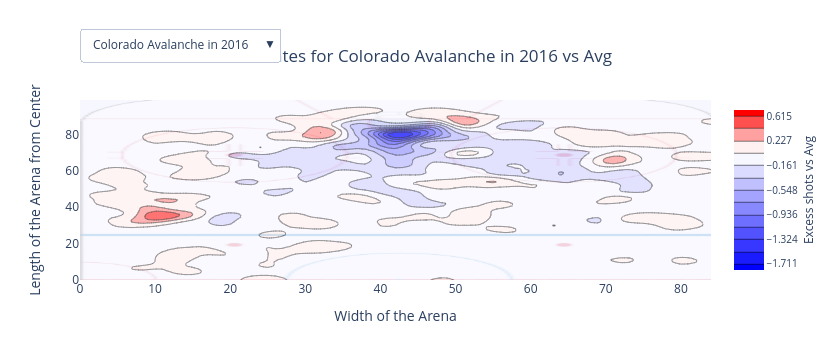

In [41]:
import plotly.graph_objects as go
import pandas as pd

#button dependent interaction hard without dash

#initilize values
sType ='Both'
year = 2016 #2020
contourN = 12
selected_team='Colorado Avalanche'
selected_teami=['Tampa Bay Lightning','Buffalo Sabres']

#generate all maps for all teams in selections
team_binned_grid = genTeamGrid(binned_gridi[str(2016)],dfs_tidyi[str(2016)],Teamnamesi[str(2016)],selected_team)
colorscale,minG,maxG = setContour(team_binned_grid,contourN)

team_binned_grid2 = genTeamGrid(binned_gridi[str(2020)],dfs_tidyi[str(2020)],Teamnamesi[str(2020)],selected_team)
colorscale2,minG2,maxG2 = setContour(team_binned_grid2,contourN)


team_binned_gridi = [team_binned_grid, team_binned_grid2]
colorscalei = [colorscale, colorscale2]
minGi = [minG, minG2]
maxGi = [maxG, maxG2]
namei = [f'{selected_team} in 2016',f'{selected_team} in 2020']

#append other games
for team in selected_teami:
    for i in range(2018,2021):
        team_binned_gridi.append(genTeamGrid(binned_gridi[str(i)],dfs_tidyi[str(i)],Teamnamesi[str(i)],team))
        colorscale,minG,maxG = setContour(team_binned_gridi[-1],12)
        colorscalei.append(colorscale)
        minGi.append(minG)
        maxGi.append(maxG)
        namei.append(f'{team} in {i}')

buttons = []
for i,d in enumerate(team_binned_gridi):
    visible = [False]*len(team_binned_gridi)
    visible[i] = True,
    name = namei[i]
    buttons.append(dict(label=namei[i],
                        method="update",
                        args=[{"visible":visible},
                              {"title":f"Shot rates for {namei[i]} vs Avg"}]))

updatemenus = [{'active':0, 
                "buttons":buttons, 
                "x":0,
                "y":1.4,
                "xanchor":'left',
                "yanchor":'top'}]


fig = go.Figure(layout=dict(updatemenus=updatemenus))

for i in range(len(team_binned_gridi)):
    fig.add_trace(go.Contour(
        z=team_binned_gridi[i],
        connectgaps=False,
        colorbar=dict(title='Excess shots vs Avg',
                      titleside='right',nticks=12,tickfont_size=10
                     ),
        colorscale = colorscalei[i],
        visible = True if i == 0 else False,
        contours=dict(
            start=minGi[i],
            end=maxGi[i],
            size=(maxGi[i]-minGi[i])/12,
       ),
       line_smoothing=0.85
    ))


fig.add_layout_image(dict(
                                source=nimg,
                                xref="x",
                                yref="y",
                                x=0,
                                y=100,
                                sizex=85,
                                sizey=100,
                                sizing="stretch",
                                opacity=0.2,
                                layer="above"
                        )
)
                 
fig.update_layout(title={
                        'text': "Shot rates for Colorado Avalanche in 2016 vs Avg",
                        #y':0.9,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                        xaxis_title="Width of the Arena",
                        yaxis_title="Length of the Arena from Center",
)

fig.show()